## Assignment 8A
In this assignment, you will practice working with random number generators and their applications to physical simulations. You are required to use the *recommended random number generators* discussed in class, as outlined in the lecture notes. Always use a seed, to ensure reproducibility.

### Problem 1 (20 points)
a) Write a program that generates and prints out two random numbers between 1 and 6, to simulate the rolling of two dices.

b) Modify your program to simulate rolling two dice one million times. Count how often a double six appears, then divide this count by one million to obtain the fraction of double sixes. You should get something close to, though probably not exactly equal to $\tfrac{1}{36}$.

In [27]:
# Imports
import numpy as np

# Part A
print(f"Random Dice Roll: {np.random.randint(1, 6+1)}, {np.random.randint(1, 6+1)}")

# Part B
COUNT = 1_000_000
rolls = np.random.randint(1, 6+1, size=(COUNT, 2))
double_six = [1 for roll in rolls if roll[0] == 6 and roll[1] == 6]
double_six = sum(double_six)
print(f"Total Double Sixes: {double_six} ({COUNT*1/36})")
print(f"Prop  Double Sixes: {double_six/COUNT} ({1/36})")

Random Dice Roll: 1, 3
Total Double Sixes: 27645 (27777.777777777777)
Prop  Double Sixes: 0.027645 (0.027777777777777776)


### Problem 2 (40 points)
This problem extends the simple radioactive decay simulation covered in the class notes. The isotope $^{213}\text{Bi}$ decays to stable $^{209}\text{Bi}$ via one of two different routes, with probabilities and half-lives thus:
$$\begin{align}
^{213}\text{Bi}&\xrightarrow[97.91\%]{\tau=46\text{ min}}\ ^{209}\text{Pb}\\
^{213}\text{Bi}&\xrightarrow[2.09\%]{\tau=46\text{ min}}\ ^{209}\text{Tl}\\
^{209}\text{Tl}&\xrightarrow[]{\tau=2.2\text{ min}}\ ^{209}\text{Pb}\\
^{209}\text{Pb}&\xrightarrow[]{\tau=3.3\text{ min}}\ ^{209}\text{Bi}\\
\end{align}$$
(Technically, $^{209}\text{Bi}$ is not truly stable, but with a half-life exceeding $10^{19}$ years—over a billion times the age of the universe—it is effectively stable for practical purposes.)

Starting with a sample consisting of 10,000 atoms of $^{213}\text{Bi}$, simulate the decay of the atoms as shown in the example problem in notes by dividing time into slices of length $\delta t = 1\text{s}$ each and on each step doing the following:


#### Problem 2.A
For each atom of $^{209}\text{Pb}$ in turn, decide at random, with the appropriate probability, whether it decays or not. The probability is given in the class notes:
$$P(t)=1-2^{-t/\tau}$$
Count the total number that decay, subtract it from the number of $^{209}\text{Pb}$ atoms, and add it to the number of $^{209}\text{Bi}$ atoms.

#### Problem 2.B
Now do the same for $^{209}\text{Tl}$, except that decaying atoms are subtracted from the total for $^{209}\text{Tl}$ and added to the total for $^{209}\text{Pb}$.

#### Problem 2.C
For $^{213}\text{Bi}$, the situation is more complicated: when a $^{213}\text{Bi}$ atom decays, you have to decide at random with the appropriate probability the route by which it decays. Count the numbers that decay by each route and add and subtract accordingly.

Running simulation for 333.3 minutes.
Bi213: 10000, Tl209: 0, Pb209: 0, Bi209: 0
Bi213: 4901, Tl209: 7, Pb209: 373, Bi209: 4719
Bi213: 2376, Tl209: 2, Pb209: 158, Bi209: 7464
Bi213: 1154, Tl209: 3, Pb209: 84, Bi209: 8759
Bi213: 590, Tl209: 0, Pb209: 34, Bi209: 9376
Bi213: 279, Tl209: 1, Pb209: 30, Bi209: 9690
Bi213: 126, Tl209: 0, Pb209: 6, Bi209: 9868
Bi213: 61, Tl209: 0, Pb209: 3, Bi209: 9936
Bi213: 30, Tl209: 0, Pb209: 2, Bi209: 9968
Bi213: 19, Tl209: 0, Pb209: 0, Bi209: 9981
Bi213: 7, Tl209: 0, Pb209: 0, Bi209: 9993


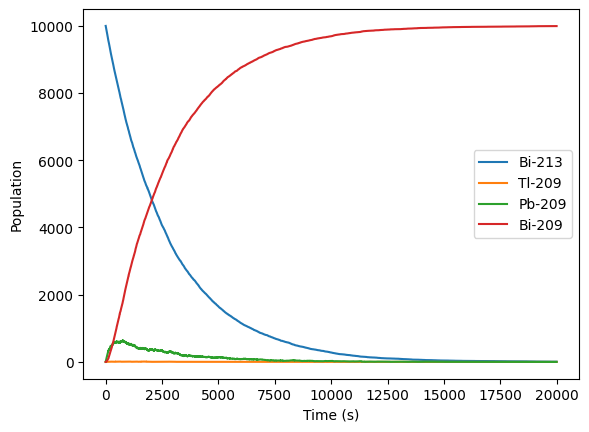

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt


# Random Choice Maker function


# Classes for the Isotopes
class Isotope:
    def __init__(self, population: int, half_life_seconds: float) -> None:
        self.population: int = population
        self.half_life_seconds: float = half_life_seconds

    def __add__(self, other: "Isotope") -> "Isotope":
        if type(self) == type(other):
            return type(self)(self.population + other.population)
        else:
            raise ValueError("Cannot add different types of isotopes.")
        
    def __iadd__(self, other: "Isotope") -> "Isotope":
        if type(self) == type(other):
            self.population += other.population
            return self
        else:
            raise ValueError("Cannot add different types of isotopes.")

    def __repr__(self):
        return f"{type(self).__name__}({self.population})"

    def _decay_population(self, Δt: float) -> int:

        # Calculate the decay quantities
        decay_probability: float = 1 - np.exp(-Δt/self.half_life_seconds)
        decay_population: int = sum([1 for _ in range(self.population) if np.random.rand() < decay_probability])

        # Update the population and return the decayed population
        self.population -= decay_population
        return decay_population
    
    def decay(self, Δt: float) -> int:
        raise NotImplementedError("Subclasses must implement the decay method.")

class Bismuth213(Isotope):
    def __init__(self, population: int):
        super().__init__(population, half_life_seconds=46*60)
    
    def decay(self, Δt: float) -> tuple[Isotope, Isotope]:
        decay_population: int = self._decay_population(Δt)
        new_Tl209 = 0
        new_Pb209 = 0
        for _ in range(decay_population):
            if np.random.rand() < 0.9791:  # Probability to decay to Pb209
                new_Pb209 += 1
            else:                          # Probability to decay to Tl209
                new_Tl209 += 1
        return (Thallium209(new_Tl209), Lead209(new_Pb209))
        
class Thallium209(Isotope):
    def __init__(self, population: int):
        super().__init__(population, half_life_seconds=2.2*60)

    def decay(self, Δt: float) -> tuple[Isotope, Isotope]:
        decay_population: int = self._decay_population(Δt)
        return Lead209(decay_population)

class Lead209(Isotope):
    def __init__(self, population: int):
        super().__init__(population, half_life_seconds=3.3*60)

    def decay(self, Δt: float) -> tuple[Isotope, Isotope]:
        decay_population: int = self._decay_population(Δt)
        return Bismuth209(decay_population)

class Bismuth209(Isotope):
    def __init__(self, population: int):
        super().__init__(population, half_life_seconds=float("inf"))

    def decay(self, Δt: float) -> tuple[Isotope, Isotope]:
        raise NotImplementedError("Bismuth-209 cannot decay.")


# Initial Populations
POPULATION_BI213: int = 10_000  # Initial Bi-213 Population
Δt: float = 1.0                 # 1 second time step
Bi213: Isotope = Bismuth213(POPULATION_BI213)
Tl209: Isotope = Thallium209(0)
Pb209: Isotope = Lead209(0)
Bi209: Isotope = Bismuth209(0)


# Simulation Parameters
TIME = 20_000
PLOT_RESULTS = True  # This shit is SLOWWWWWWW
BI213_DECAY_CHAIN = True
TL209_DECAY_CHAIN = True
PB209_DECAY_CHAIN = True
if PLOT_RESULTS:
    Bi213_list = []
    Tl209_list = []
    Pb209_list = []
    Bi209_list = []

# Simulation Execution
print(f"Running simulation for {TIME/60:.1f} minutes.")
for _ in range(TIME):

    # Print the populations
    if _ % 2_000 == 0:
        print(f"Bi213: {Bi213.population}, Tl209: {Tl209.population}, Pb209: {Pb209.population}, Bi209: {Bi209.population}")

    # Lead-209 Decay
    if PB209_DECAY_CHAIN and Pb209.population != 0:
        new_Bi209 = Pb209.decay(Δt)  # Removes decayed population
        Bi209 += new_Bi209           # Adds new Bismuth-209 population

    # Thallium-209 Decay
    if TL209_DECAY_CHAIN and Tl209.population != 0:
        new_Pb209 = Tl209.decay(Δt)  # Removes decayed population
        Pb209 += new_Pb209           # Adds new Lead-209 population

    # Bisuth-213 Decay
    if BI213_DECAY_CHAIN and Bi213.population != 0:
        new_Tl209, new_Pb209 = Bi213.decay(Δt)  # Removes decayed population
        Tl209 += new_Tl209                      # Adds new Thallium-209 population
        Pb209 += new_Pb209                      # Adds new Lead-209 population

    # If plot, plot the results
    if PLOT_RESULTS:
        Bi213_list.append(Bi213.population)
        Tl209_list.append(Tl209.population)
        Pb209_list.append(Pb209.population)
        Bi209_list.append(Bi209.population)
    
    # Assert population is conserved
    assert (POPULATION_BI213 == Bi213.population + Tl209.population + Pb209.population + Bi209.population)
    
# Print the final populations
print(f"Bi213: {Bi213.population}, Tl209: {Tl209.population}, Pb209: {Pb209.population}, Bi209: {Bi209.population}")

# Plot if applicable
if PLOT_RESULTS:
    plt.plot(Bi213_list, label="Bi-213")
    plt.plot(Tl209_list, label="Tl-209")
    plt.plot(Pb209_list, label="Pb-209")
    plt.plot(Bi209_list, label="Bi-209")
    plt.xlabel("Time (s)")
    plt.ylabel("Population")
    # plt.yscale("log")
    plt.legend()
    plt.show()

### Problem 3 (40 points)

Brownian motion is the motion of a particle, such as a smoke or dust particle, in a gas, as it is buffeted by random collisions with gas molecules. Make a simple computer simulation of such a particle in two dimensions as follows.

The particle is confined to a square grid or lattice $L\times L$ squares on a side, so that its position can be represented by two integers $i,j=0,1,\dots,L-1$. It starts in the middle of the grid. On each step of the simulation, choose a random direction—up, down, left, or right—and move the particle one step in that direction. This process is called a random walk. The particle is not allowed to move outside the limits of the lattice—if it tries to do so, choose a new random direction to move in.

Write a program to perform a $10000$ steps of this process on a lattice with $L = 101$ and make an animation on the screen of the position of the particle.
(We choose an odd length for the side of the square so that there is one lattice site exactly in the center.) If you are unsure how to animate, provide a few snapshots of the particle at different points in its motion. There will not be any point deduction if the animation does not work.

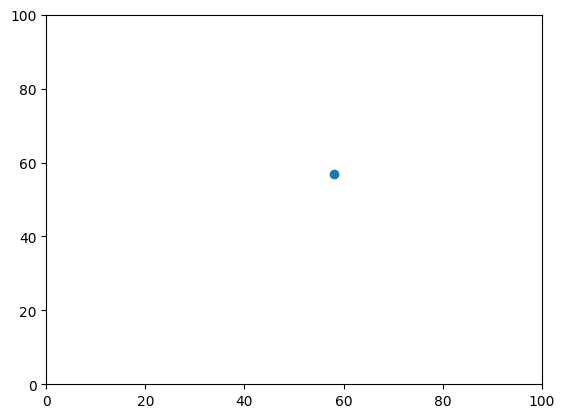

In [1]:
# Imports
import numpy as np

# Random Choice Maker function
def random_direction() -> tuple[int, int]:
    direction = np.random.randint(0, 4)
    if direction == 0:
        return (1, 0)
    elif direction == 1:
        return (-1, 0)
    elif direction == 2:
        return (0, 1)
    elif direction == 3:
        return (0, -1)
    
# Problem Parameters
L = 100  # Grid Size
STEPS = 10_000  # Number of Steps
START = (L//2, L//2)  # Starting Position

# Make an animation out of the simulation
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create the figure
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)

# Create the scatter plot
scat = ax.scatter([], [])
scat.set_offsets([START])

# Update function
def update(frame):
    global scat
    x, y = scat.get_offsets()[0]
    dx, dy = random_direction()
    x += dx
    y += dy
    if x < 0 or x > L:
        x -= 2 * dx
    if y < 0 or y > L:
        y -= 2 * dy
    scat.set_offsets([[x, y]])
    return scat

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=STEPS, interval=100, repeat=False)
ani.save(filename="anim.gif", writer="pillow")
plt.show()
